# 🔐 Assinaturas Digitais com RSA e ECDSA

Este notebook ilustra, na prática, como funcionam as assinaturas digitais com RSA e ECDSA.


- Gerar pares de chaves (RSA e ECDSA)
- Assinar mensagens
- Verificar assinaturas
- Ver o efeito de alterar mensagens ou assinaturas
- Discutir casos de uso reais

## 🛠️ Bibliotecas Necessárias


In [ ]:
!pip install cryptography pycoin eth_keys
# recuperação da chave pública a partir da assinatura
!pip install eth_keys

## 🔑 Geração de Chaves RSA e ECDSA

In [ ]:
from cryptography.hazmat.primitives.asymmetric import rsa, ec
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding

# Geração de chaves RSA
rsa_private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048
)
rsa_public_key = rsa_private_key.public_key()

# Geração de chaves ECDSA
ecdsa_private_key = ec.generate_private_key(ec.SECP256R1())
ecdsa_public_key = ecdsa_private_key.public_key()

print("Chaves geradas com sucesso!")

## 📧 Assinando menssagens curtas

Como ja vistos nas aulas anteriores

### ✍️ Assinando Mensagens

In [ ]:
message = b"Mensagem importante: Transferencia de R 10.000"

# Assinatura com RSA
rsa_signature = rsa_private_key.sign(
    message,
    padding.PKCS1v15(),
    hashes.SHA256()
)

# Assinatura com ECDSA
ecdsa_signature = ecdsa_private_key.sign(
    message,
    ec.ECDSA(hashes.SHA256())
)
print("Mensagens assinadas com sucesso!")

### ✅ Verificando Assinaturas

In [ ]:
# Verificação RSA
try:
    rsa_public_key.verify(
        rsa_signature,
        message,
        padding.PKCS1v15(),
        hashes.SHA256()
    )
    print("✅ Assinatura RSA válida!")
except Exception as e:
    print("❌ Assinatura RSA inválida!", str(e))

# Verificação ECDSA
try:
    ecdsa_public_key.verify(
        ecdsa_signature,
        message,
        ec.ECDSA(hashes.SHA256())
    )
    print("✅ Assinatura ECDSA válida!")
except Exception as e:
    print("❌ Assinatura ECDSA inválida!", str(e))

### 🧪 Efeitos de Alterações
Vamos modificar a mensagem e observar o impacto:

In [ ]:
tampered_message = b"Mensagem alterada: Transferencia de R 1.000"

# Teste com assinatura RSA
try:
    rsa_public_key.verify(
        rsa_signature,
        tampered_message,
        padding.PKCS1v15(),
        hashes.SHA256()
    )
    print("❌ Erro: Alteração não detectada (RSA)")
except:
    print("✅ Alteração detectada (RSA)")

# Teste com assinatura ECDSA
try:
    ecdsa_public_key.verify(
        ecdsa_signature,
        tampered_message,
        ec.ECDSA(hashes.SHA256())
    )
    print("❌ Erro: Alteração não detectada (ECDSA)")
except:
    print("✅ Alteração detectada (ECDSA)")

## 📄 Assinando um Arquivo PDF com RSA


Vamos calcular o hash de um arquivo PDF e assiná-lo digitalmente com a chave privada RSA.

In [ ]:
import hashlib
from pathlib import Path

pdf_path = Path("exemplo.pdf") 

if not pdf_path.exists():
    with open(pdf_path, "wb") as f:
        f.write(b"Exemplo de conteudo para PDF.")

Ler conteúdo do PDF e gerar hash SHA-256


In [ ]:
# Ler conteúdo do PDF e gerar hash SHA-256
pdf_bytes = pdf_path.read_bytes()
pdf_hash = hashlib.sha256(pdf_bytes).digest()
print(f"PDF com {len(pdf_bytes)} bytes")
print(f"Hash SHA-256 do PDF: {pdf_hash.hex()}")


Assinar o hash com RSA

In [ ]:
pdf_signature = rsa_private_key.sign(
    pdf_hash,
    padding.PKCS1v15(),
    hashes.SHA256()
)
print("Assinatura digital do PDF criada com sucesso!")
print(f"Assinatura digital do PDF: {pdf_signature.hex()}")

#### ✅ Verificando a Assinatura de um PDF

In [ ]:
try:
    rsa_public_key.verify(
        pdf_signature,
        pdf_hash,
        padding.PKCS1v15(),
        hashes.SHA256()
    )
    print("✅ Assinatura do PDF válida!")
except Exception as e:
    print("❌ Assinatura do PDF inválida!", str(e))

## 🌐 Casos de Uso no Mundo Real

1. **Certificados HTTPS:** navegadores validam a autenticidade de sites com certificados assinados digitalmente.
2. **Criptomoedas:** transações Bitcoin e Ethereum usam ECDSA para garantir que apenas o dono da chave gaste os fundos.
3. **Documentos Eletrônicos:** Assinaturas digitais garantem validade jurídica em contratos eletrônicos.

## 🔍 Recuperação de Chave Pública a partir da Assinatura (ECDSA)
Com ECDSA é possível recuperar a chave pública a partir da assinatura e da mensagem, desde que a assinatura esteja em formato estendido (r, s, v).

In [ ]:
from eth_keys import keys
from eth_utils import keccak
import os

gerar as chaves ethereum

In [ ]:
priv_key_bytes = os.urandom(32)
priv_key = keys.PrivateKey(priv_key_bytes)
pub_key = priv_key.public_key
pub_key

assinando

In [ ]:
msg = b'Mensagem para assinatura com recuperacao'
msg_hash = keccak(msg) #hash 
signature = priv_key.sign_msg_hash(msg_hash)

msg_hash , signature

derivando a chave publica

- é importante garantir que a assinatura seja válida e que o hash da mensagem seja o mesmo usado na assinatura.

In [ ]:
recovered_pub_key = signature.recover_public_key_from_msg_hash(msg_hash)
recovered_pub_key

⚠️ **Quando a derivação da chave pública é feita a partir da assinatura, pode ser util?**


In [ ]:
print("Chaves iguais?", pub_key == recovered_pub_key)

## 📈 Visualização da Curva Elíptica (secp256k1)

visualizar uma parte da curva elíptica usada no ECDSA.

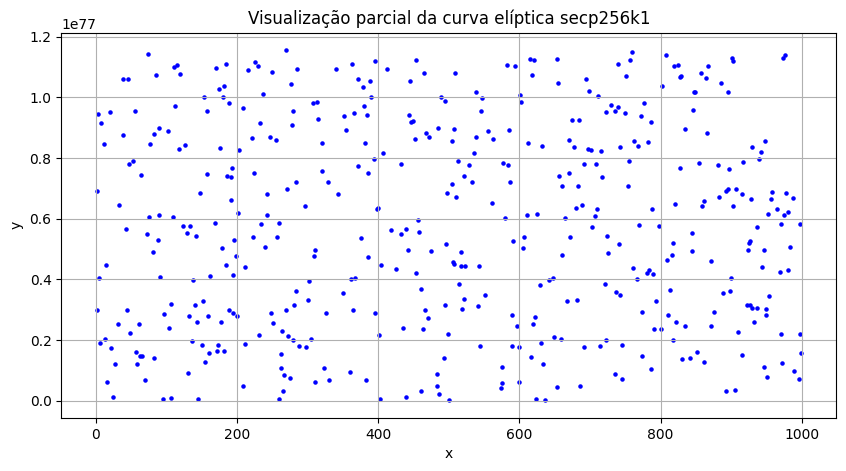

In [65]:
import matplotlib.pyplot as plt

# Parâmetros da curva secp256k1
p = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F
a = 0
b = 7

# Gerar pontos da curva
x_vals = []
y_vals = []

# valores pequenos apenas para visualização
# limite = 2^128
limite = 1000
for x in range(1, limite):  
    rhs = (x**3 + a * x + b) % p
    y = pow(rhs, (p + 1) // 4, p)
    if (y * y) % p == rhs:
        x_vals.append(x)
        y_vals.append(y)

plt.figure(figsize=(10, 5))
plt.scatter(x_vals, y_vals, s=5, color='blue')
plt.title("Visualização parcial da curva elíptica secp256k1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()